### models 

#### DummyClassifier 

In [851]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from imblearn.metrics import classification_report_imbalanced

In [827]:
from sklearn.metrics import balanced_accuracy_score,classification_report, confusion_matrix, plot_confusion_matrix, precision_recall_curve, plot_roc_curve,auc

In [860]:


dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)


DummyClassifier(strategy='most_frequent')

In [861]:
y_train_pred = dummy_clf.predict(X_train)
y_test_pred = dummy_clf.predict(X_test)

In [862]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      4552
           1       0.00      0.00      0.00       845

    accuracy                           0.84      5397
   macro avg       0.42      0.50      0.46      5397
weighted avg       0.71      0.84      0.77      5397



/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [863]:
print(classification_report_imbalanced(y_test,y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      1.00      0.00      0.92      0.00      0.00      4552
          1       0.00      0.00      1.00      0.00      0.00      0.00       845

avg / total       0.71      0.84      0.16      0.77      0.00      0.00      5397



/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [864]:
balanced_accuracy_score(y_test,y_test_pred)

0.5

#### RandomForest 

In [865]:
steps_rf = [('tf',Transformer()),
        ('rfc',RandomForestClassifier(n_estimators=20,class_weight='balanced',max_depth=3,min_samples_leaf=2,min_samples_split=20,random_state=101))]
rf_model = Pipeline(steps_rf)
rf_model = rf_model.fit(X_train,y_train)

In [866]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [867]:
print(classification_report_imbalanced(y_test,y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.59      0.68      0.72      0.63      0.40      4552
          1       0.24      0.68      0.59      0.35      0.63      0.41       845

avg / total       0.80      0.61      0.66      0.66      0.63      0.40      5397



In [868]:
balanced_accuracy_score(y_test,y_test_pred)

0.6356935244017845

In [600]:
from sklearn.model_selection import GridSearchCV

In [601]:
params={'rfc__n_estimators': [3,5,10,20],
       'rfc__min_samples_split':[10,20,30],
       'rfc__max_depth':[3,4,5],
        'rfc__min_samples_leaf': [2,10,20,30]
       }
steps_rf = [('tf',Transformer()),
      ('rfc',RandomForestClassifier(class_weight='balanced',random_state=101))]
rf_model = Pipeline(steps_rf)

rf_grid = GridSearchCV(rf_model,param_grid = params,cv=5,scoring = 'f1')
rf_grid = rf_grid.fit(X_train,y_train)

In [602]:
rf_grid.best_params_

{'rfc__max_depth': 3,
 'rfc__min_samples_leaf': 2,
 'rfc__min_samples_split': 20,
 'rfc__n_estimators': 20}

In [603]:
y_train_pred = rf_grid.predict(X_train)
y_test_pred = rf_grid.predict(X_test)

In [604]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.59      0.72      4552
           1       0.24      0.68      0.35       845

    accuracy                           0.61      5397
   macro avg       0.57      0.64      0.53      5397
weighted avg       0.80      0.61      0.66      5397



In [605]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.60      0.72     10621
           1       0.24      0.70      0.36      1970

    accuracy                           0.61     12591
   macro avg       0.58      0.65      0.54     12591
weighted avg       0.81      0.61      0.67     12591



/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


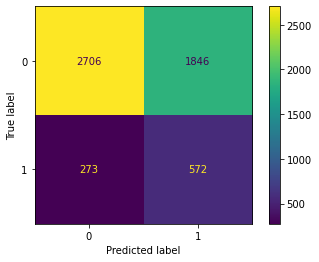

In [606]:
plot_confusion_matrix(rf_grid,X_test,y_test)

/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


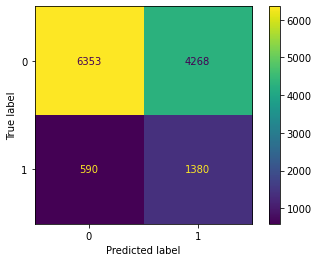

In [607]:
plot_confusion_matrix(rf_grid,X_train,y_train)

In [608]:
y_test_proba = rf_grid.predict_proba(X_test)[:,1]

/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


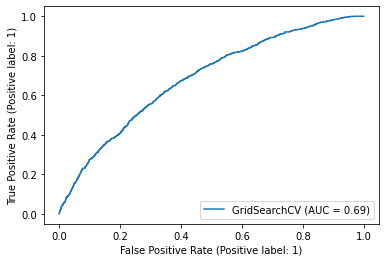

In [609]:
plot_roc_curve(rf_grid,X_test,y_test)

In [610]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test,y_test_proba)
auc_rf = auc(recall_rf, precision_rf)

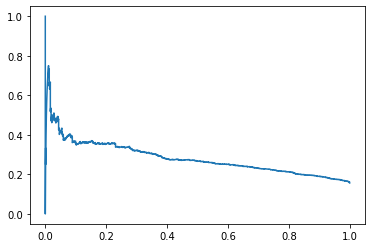

In [611]:
plt.plot(recall_rf, precision_rf)

In [612]:
auc_rf

0.282255127539604

#### Logistic Regression 

In [568]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [870]:
steps_lr = [('tf',Transformer()),
            ('scaler',StandardScaler()),
        ('lr',LogisticRegression(class_weight='balanced',random_state=101))]
lr_model = Pipeline(steps_lr)
lr_model = lr_model.fit(X_train,y_train)

In [871]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [872]:
print(classification_report_imbalanced(y_test,y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.66      0.57      0.76      0.61      0.38      4552
          1       0.24      0.57      0.66      0.33      0.61      0.37       845

avg / total       0.79      0.65      0.58      0.69      0.61      0.38      5397



In [873]:
balanced_accuracy_score(y_test,y_test_pred)

0.6144952215555163

In [631]:
params={'lr__penalty': ['l1','l2','elasticnet', 'none'],
       'lr__C':[1,0.1,10],
       'lr__fit_intercept':[True,False],
        'lr__l1_ratio': [0.1,0.5,0.9]}
       

steps_lr = [('tf',Transformer()),
            ('scaler',StandardScaler()),
      ('lr',LogisticRegression(class_weight='balanced',random_state=101))]
lr_model = Pipeline(steps_lr)

lr_grid = GridSearchCV(lr_model,param_grid = params,cv=5,scoring = 'f1')
lr_grid = lr_grid.fit(X_train,y_train)

/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'.

/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'.

/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  wa

/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalt

/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'.

/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warn

In [632]:
lr_grid.best_params_

{'lr__C': 1,
 'lr__fit_intercept': True,
 'lr__l1_ratio': 0.1,
 'lr__penalty': 'none'}

In [633]:
y_train_pred = lr_grid.predict(X_train)
y_test_pred = lr_grid.predict(X_test)

print(classification_report(y_test,y_test_pred))

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      4552
           1       0.24      0.57      0.33       845

    accuracy                           0.65      5397
   macro avg       0.56      0.61      0.55      5397
weighted avg       0.79      0.65      0.69      5397

              precision    recall  f1-score   support

           0       0.92      0.67      0.77     10621
           1       0.27      0.67      0.39      1970

    accuracy                           0.67     12591
   macro avg       0.59      0.67      0.58     12591
weighted avg       0.81      0.67      0.71     12591



In [634]:
y_test_proba = lr_grid.predict_proba(X_test)[:,1]

/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


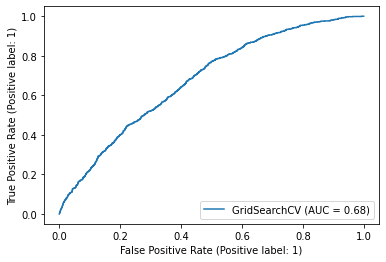

In [635]:
plot_roc_curve(lr_grid,X_test,y_test)

In [636]:
precision_lr, recall_lr, _ = precision_recall_curve(y_test,y_test_proba)
auc_lr = auc(recall_lr, precision_lr)

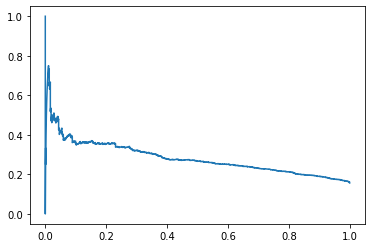

In [637]:
plt.plot(recall_rf, precision_rf)

In [638]:
auc_lr

0.2650994707719074

#### Resampling 

In [701]:
from imblearn.over_sampling import SMOTE, ADASYN

steps_knn = [('tf',Transformer()),
            ('scaler',StandardScaler()),
        ('knn',KNeighborsClassifier(n_neighbors=n))]
    knn_model = Pipeline(steps_knn)
    knn_model = knn_model.fit(X_train,y_train)
X_resampled, y_resampled = SMOTE().fit_resample(X_, y)
model = make_pipeline(
    RandomUnderSampler(random_state=0),
    HistGradientBoostingClassifier(random_state=0) 
    max_depth': 3,
 'rfc__min_samples_leaf': 2,
 'rfc__min_samples_split': 20,
 'rfc__n_estimators': 20
 steps_smote = [('tf',Transformer()),
             ('smote', SMOTE()),
            ('scaler',StandardScaler()),
        ('rf',RandomForestClassifier(n_estimators=20, min_samples_leaf=2,min_samples_split=20,max_depth=3))]
model_smote = Pipeline(steps_smote)
model_smote = model_smote.fit(X_train,y_train)

In [886]:
from imblearn.pipeline import make_pipeline
tf = Transformer()
scaler = StandardScaler()
smote = SMOTE()
rfc = RandomForestClassifier(n_estimators=20,max_depth=3,min_samples_leaf=2,min_samples_split=20,random_state=101)

smote_model = make_pipeline(tf, scaler,smote, rfc)
smote_model.fit(X_train,y_train)



Pipeline(steps=[('transformer', <__main__.Transformer object at 0x1407499f0>),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, min_samples_leaf=2,
                                        min_samples_split=20, n_estimators=20,
                                        random_state=101))])

In [887]:
y_train_pred = smote_model.predict(X_train)
y_test_pred = smote_model.predict(X_test)

In [889]:
print(classification_report_imbalanced(y_test,y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.78      0.41      0.82      0.57      0.33      4552
          1       0.26      0.41      0.78      0.32      0.57      0.31       845

avg / total       0.78      0.72      0.47      0.75      0.57      0.33      5397



In [890]:
#ada
from imblearn.pipeline import make_pipeline
tf = Transformer()
scaler = StandardScaler()
ada = ADASYN()
rfc = RandomForestClassifier(n_estimators=20,max_depth=3,min_samples_leaf=2,min_samples_split=20,random_state=101)

smote_model = make_pipeline(tf, scaler,ada, rfc)
smote_model.fit(X_train,y_train)



Pipeline(steps=[('transformer', <__main__.Transformer object at 0x14074af80>),
                ('standardscaler', StandardScaler()), ('adasyn', ADASYN()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, min_samples_leaf=2,
                                        min_samples_split=20, n_estimators=20,
                                        random_state=101))])

In [891]:
y_train_pred = smote_model.predict(X_train)
y_test_pred = smote_model.predict(X_test)

In [892]:
print(classification_report_imbalanced(y_test,y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.84      0.34      0.85      0.53      0.30      4552
          1       0.28      0.34      0.84      0.31      0.53      0.27       845

avg / total       0.78      0.76      0.42      0.77      0.53      0.29      5397



In [736]:
from imblearn.under_sampling import EditedNearestNeighbours

In [893]:
enn = EditedNearestNeighbours()

In [894]:
enn_model = make_pipeline(tf, scaler,enn, smote, rfc)
enn_model.fit(X_train,y_train)

Pipeline(steps=[('transformer', <__main__.Transformer object at 0x14074af80>),
                ('standardscaler', StandardScaler()),
                ('editednearestneighbours', EditedNearestNeighbours()),
                ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, min_samples_leaf=2,
                                        min_samples_split=20, n_estimators=20,
                                        random_state=101))])

In [895]:
y_train_pred = enn_model.predict(X_train)
y_test_pred = enn_model.predict(X_test)

In [897]:
print(classification_report_imbalanced(y_test,y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.72      0.50      0.79      0.60      0.37      4552
          1       0.25      0.50      0.72      0.33      0.60      0.35       845

avg / total       0.79      0.68      0.54      0.72      0.60      0.37      5397



In [898]:
balanced_accuracy_score(y_test,y_test_pred)

0.6100455226131176

In [899]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [900]:
brfc= BalancedRandomForestClassifier(n_estimators=20,max_depth=3,min_samples_leaf=2,min_samples_split=20,random_state=101)

In [901]:
brfc_model = make_pipeline(tf, scaler,brfc)
brfc_model.fit(X_train,y_train)

Pipeline(steps=[('transformer', <__main__.Transformer object at 0x14074af80>),
                ('standardscaler', StandardScaler()),
                ('balancedrandomforestclassifier',
                 BalancedRandomForestClassifier(max_depth=3, min_samples_leaf=2,
                                                min_samples_split=20,
                                                n_estimators=20,
                                                random_state=101))])

In [902]:
y_train_pred = brfc_model.predict(X_train)
y_test_pred = brfc_model.predict(X_test)

In [903]:
print(classification_report_imbalanced(y_test,y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.57      0.67      0.70      0.62      0.38      4552
          1       0.23      0.67      0.57      0.34      0.62      0.39       845

avg / total       0.80      0.59      0.65      0.64      0.62      0.38      5397



In [786]:
balanced_accuracy_score(y_test,y_test_pred)

0.6213362225850396

In [844]:
from imblearn.over_sampling import RandomOverSampler

In [845]:
ros = RandomOverSampler()

In [846]:
enn_model = make_pipeline(tf, scaler,ros, rfc)
enn_model.fit(X_train,y_train)

Pipeline(steps=[('transformer', <__main__.Transformer object at 0x14d7978b0>),
                ('standardscaler', StandardScaler()),
                ('randomoversampler', RandomOverSampler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, min_samples_leaf=2,
                                        min_samples_split=20, n_estimators=20,
                                        random_state=101))])

In [847]:
y_train_pred = brfc_model.predict(X_train)
y_test_pred = brfc_model.predict(X_test)

In [848]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.57      0.70      4552
           1       0.23      0.67      0.34       845

    accuracy                           0.59      5397
   macro avg       0.56      0.62      0.52      5397
weighted avg       0.80      0.59      0.64      5397



In [849]:
balanced_accuracy_score(y_test,y_test_pred)

0.6213362225850396

In [904]:
from imblearn.over_sampling import SVMSMOTE

In [905]:
svmsmote = SVMSMOTE()

In [906]:
svmsmote_model = make_pipeline(tf, scaler,svmsmote, rfc)
svmsmote_model.fit(X_train,y_train)

Pipeline(steps=[('transformer', <__main__.Transformer object at 0x14074af80>),
                ('standardscaler', StandardScaler()), ('svmsmote', SVMSMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, min_samples_leaf=2,
                                        min_samples_split=20, n_estimators=20,
                                        random_state=101))])

In [907]:
y_train_pred = svmsmote_model.predict(X_train)
y_test_pred = svmsmote_model.predict(X_test)

In [908]:
print(classification_report_imbalanced(y_test,y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.75      0.42      0.81      0.56      0.32      4552
          1       0.24      0.42      0.75      0.30      0.56      0.30       845

avg / total       0.77      0.70      0.47      0.73      0.56      0.32      5397



#### model summary


In [ ]:
Appropriate metrics are f1 score and G-mean for fraud categories 
Best Model for f1 score and G-mean is RandomForest with balanced clasweight or BalancedRandomForest.


#### feature importance 

/var/folders/d9/m8w0rn2n6wv40ms83wcdcqs00000gp/T/ipykernel_20254/3235356909.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imp_brfc = imp_brfc.sort_values('importance',ascending=False)[imp_brfc['importance']>0.02]


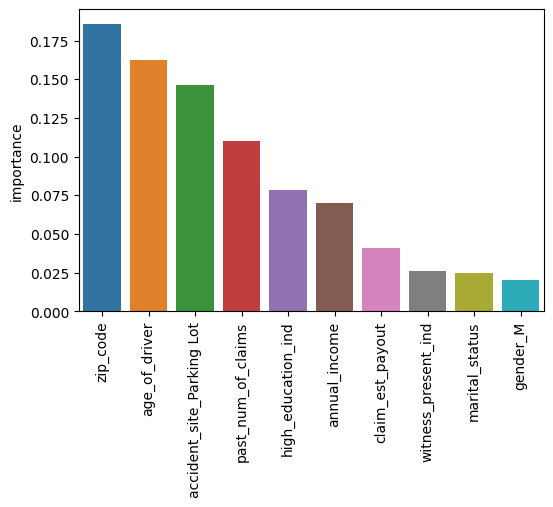

In [922]:
brfc_import = brfc_model[2].feature_importances_
imp_brfc = pd.DataFrame(index = tf_X.columns, data=brfc_import, columns = ['importance'])
imp_brfc = imp_brfc.sort_values('importance',ascending=False)[imp_brfc['importance']>0.02]
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=imp_brfc.index, y='importance', data=imp_brfc)
plt.xticks(rotation=90);

In [923]:
# analyze probability
# further analyze feature importance  using SHAP